<a href="https://colab.research.google.com/github/tiensu/DATA_SCIENCE_PJ/blob/master/Keras_TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

from keras import layers
from keras.models import Sequential

In [3]:
filepath_dict = {
    'yelp': './drive/My Drive/MACHINE_LEARNING_CODE/DATA_SET/sentiment_labelled_sentences/yelp_labelled.txt',
    'amazon': './drive/My Drive/MACHINE_LEARNING_CODE/DATA_SET/sentiment_labelled_sentences/amazon_cells_labelled.txt',
    'imdb': './drive/My Drive/MACHINE_LEARNING_CODE/DATA_SET/sentiment_labelled_sentences/imdb_labelled.txt'
}

df_list = []
for source, filepath in filepath_dict.items():
  df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
  df['source'] = source # Add another column filled with the source name
  df_list.append(df)
df = pd.concat(df_list)
df.head()

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp


In [0]:
df_yelp = df[df['source'] == 'yelp']
sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=42)

In [0]:
# Vectorize sentences using Bag of word
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [6]:
# Build model with Logistic Regression in Sklearn
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", score)

Accuracy: 0.816


In [7]:
# With all data
for source in df['source'].unique():
    df_source = df[df['source'] == source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    sentences_train, sentences_test, y_train, y_test = train_test_split(
        sentences, y, test_size=0.25, random_state=42)

    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train)
    X_train = vectorizer.transform(sentences_train)
    X_test  = vectorizer.transform(sentences_test)

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    print("Accuracy:", score)

Accuracy: 0.816
Accuracy: 0.844
Accuracy: 0.7272727272727273


In [0]:
# Build model with Keras
input_dim = X_train.shape[1]
model = Sequential()
model.add(layers.Dense(units=10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                24260     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 24,271
Trainable params: 24,271
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Train model
history = model.fit(X_train, y_train, epochs=100, verbose=None, validation_data=(X_test, y_test), batch_size=10)

In [11]:
# Evaluation
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print('Training Accuracy: {:.4f}'.format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.7540


In [0]:
# Plot
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

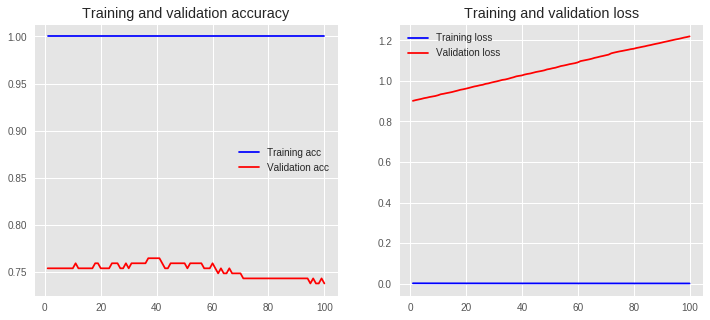

In [20]:
plot_history(history)